## ~ Introduction ~

**Market Size Analysis** involves estimating potential sales for a product or service in a specific market segment. In the case of electric vehicles (EVs), it includes evaluating total EV registrations to *gauge market growth, predict future trends*, and aid stakeholders in *production, infrastructure, and policy decisions.*

The primary objective of this analysis is  to:
- Assess the historical growth trend of EV registrations.
- Forecast future EV registrations based on historical trends.
- Analyze the distribution of EV registrations across different models, makes, and geographical regions.
- Estimate the market size and growth potential of the EV market for upcoming years.
- Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation.

Let's begin !

## ~ Importing Libraries ~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns 
from scipy.optimize import curve_fit

## ~ Reading the data and exploring it ~

In [2]:
data = pd.read_csv('ev_data.csv')
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

**Let's understand what each column says:**

- VIN (1-10): Partial Vehicle Identification Number.
- County: The county in which the vehicle is registered.
- City: The city in which the vehicle is registered.
- State: The state in which the vehicle is registered. 
- Postal Code: The postal code where the vehicle is registered.
- Model Year: The year of the vehicle model.
- Make: The manufacturer of the vehicle.
- Model: The model of the vehicle.
- Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
- Electric Range: The maximum range of the vehicle on a single charge (in miles).
- Base MSRP: The Manufacturer’s Suggested Retail Price.
- Legislative District: The legislative district where the vehicle is registered.
- DOL Vehicle ID: Department of Licensing Vehicle Identification.
- Vehicle Location: Geographic coordinates of the vehicle location.
- Electric Utility: The electric utility service provider for the vehicle’s location.
- 2020 Census Tract: The census tract for the vehicle’s location.

This data is based on the EV population in the United States and it contains 177861 rows/enteris. Let's first clean it !

In [4]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object

For analyzing the market size of electric vehicles, we can delve into several key areas:

- **EV Adoption Trend**: Examine the increase in EV population over different model years to understand the growth trajectory.
- **Geographical Spread**: Identify regions with the highest concentration of EV registrations, whether by county, city, or other geographic units.
- **EV Categorization**: Classify EVs by type, distinguishing between Battery Electric Vehicles (BEVs), Plug-in Hybrid Electric Vehicles (PHEVs), etc.
- **Popular Brands and Models**: Determine which makes and models are most prevalent among registered EVs to discern consumer preferences.
- **Electric Range Assessment**: Evaluate the electric range of vehicles to track advancements in EV technology and consumer demand for longer ranges.
- **Projected Market Expansion**: Forecast the future growth of the electric vehicle market based on historical data and emerging trends

### EV Adoption Trend

In [7]:
ev_model_year_count = data['Model Year'].value_counts().sort_index()
# ev_model_year_count = ev_model_year_count.rename_axis('Model Year').reset_index(name='Count')


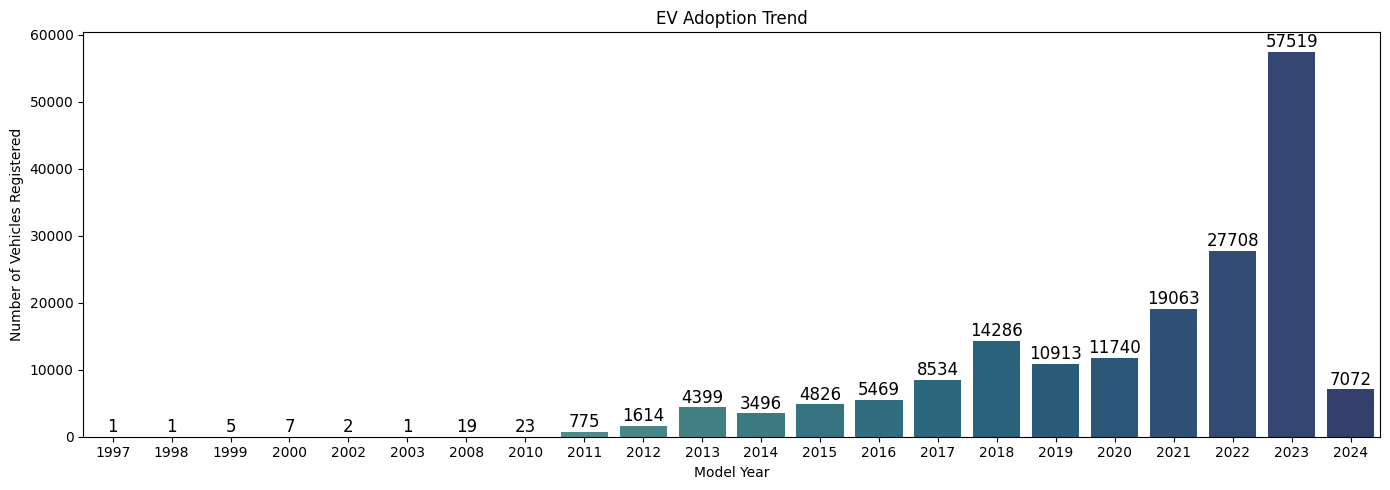

In [8]:
plt.figure(figsize=(14, 5))
ax =sns.barplot(x=ev_model_year_count.index,
            y=ev_model_year_count.values,
            palette='crest')

# Add details on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=12, 
                color='black', 
                xytext=(0, 7), 
                textcoords='offset points')
    
plt.title('EV Adoption Trend')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()
plt.show()

Looking at the bar chart, we can see that more and more people are choosing electric vehicles over time. 

The number of registered EVs slowly goes up until about 2016, and then it really takes off. From 2017 onward, there's a big jump in EV registrations. 

In the year 2023, there's a huge spike , showing the most EVs registered in a single year. *(For the year 2024, the data is till March 2024).* This suggests that EV adoption is really picking up speed.

Now let's explore the Geographical Spread!

### Geographical Spread

In [9]:
# Geographical spread at county level - Top 5 counties based on EV registrations
top_counties = data['County'].value_counts().head(5).index

# Filtering the dataset for these top counties
top_counties_data = data[data['County'].isin(top_counties)]

In [10]:
# Geographical spread at county level - Analyzing the distribution of EVs within the cities of these top counties
cities_in_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Top 20 Cities
top_cities = cities_in_top_counties.head(25)

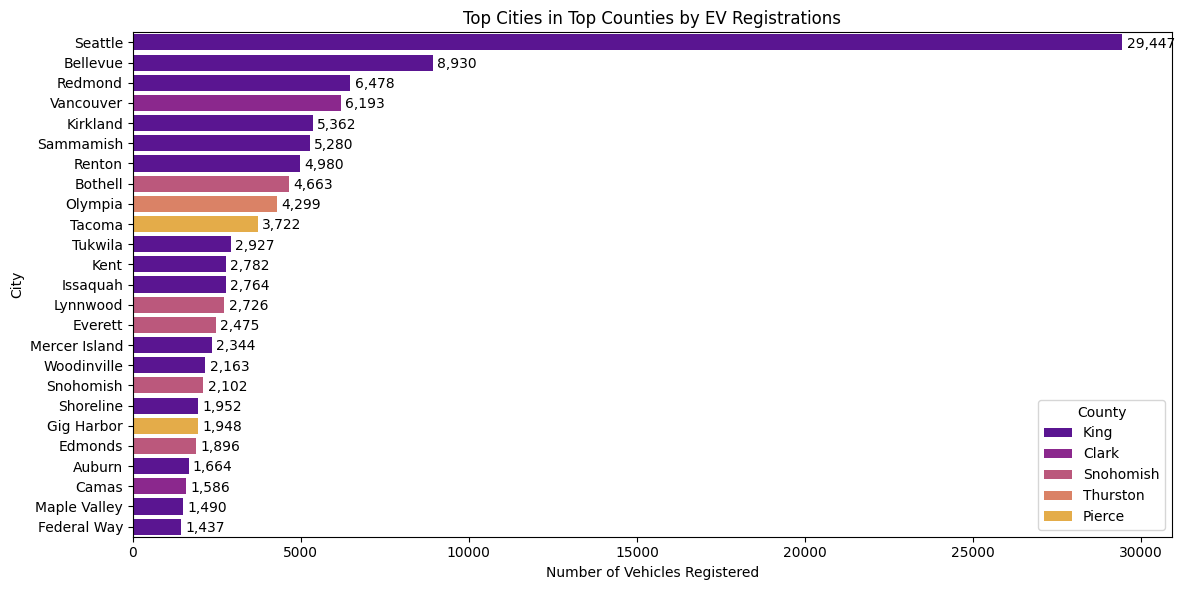

In [11]:
# Visualizing the top 20 cities across the top 5 counties
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_cities['Number of Vehicles'],
                 y=top_cities['City'],
                 palette='plasma', 
                 hue=top_cities['County'],
                 dodge=False)

# Add details on bars
for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=10,
                    color='black')
    
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County', loc='lower right')
plt.tight_layout()
plt.show()

Here are the key findings from the above graph:
- Seattle leads by a significant margin, followed by Bellevue and Redmond, all located in King County. These cities have much higher EV registrations compared to other cities.
- Vancouver, in Clark County also have noteable EV registrations.
- Bothell, Lynnwood, Everett, and other cities in Snohomish County and Olympia of Thurston county also have moderate number of EV registrations, but they generally have fewer registrations compared to the top 3 King County cities.
- Tacoma, representing Pierce County, has fewer EV registrations compared to cities in King and Snohomish counties.

**Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.**

Now let's explore the EV Categorization!

### EV Categorization 

In [12]:
ev_type = data['Electric Vehicle Type'].value_counts()

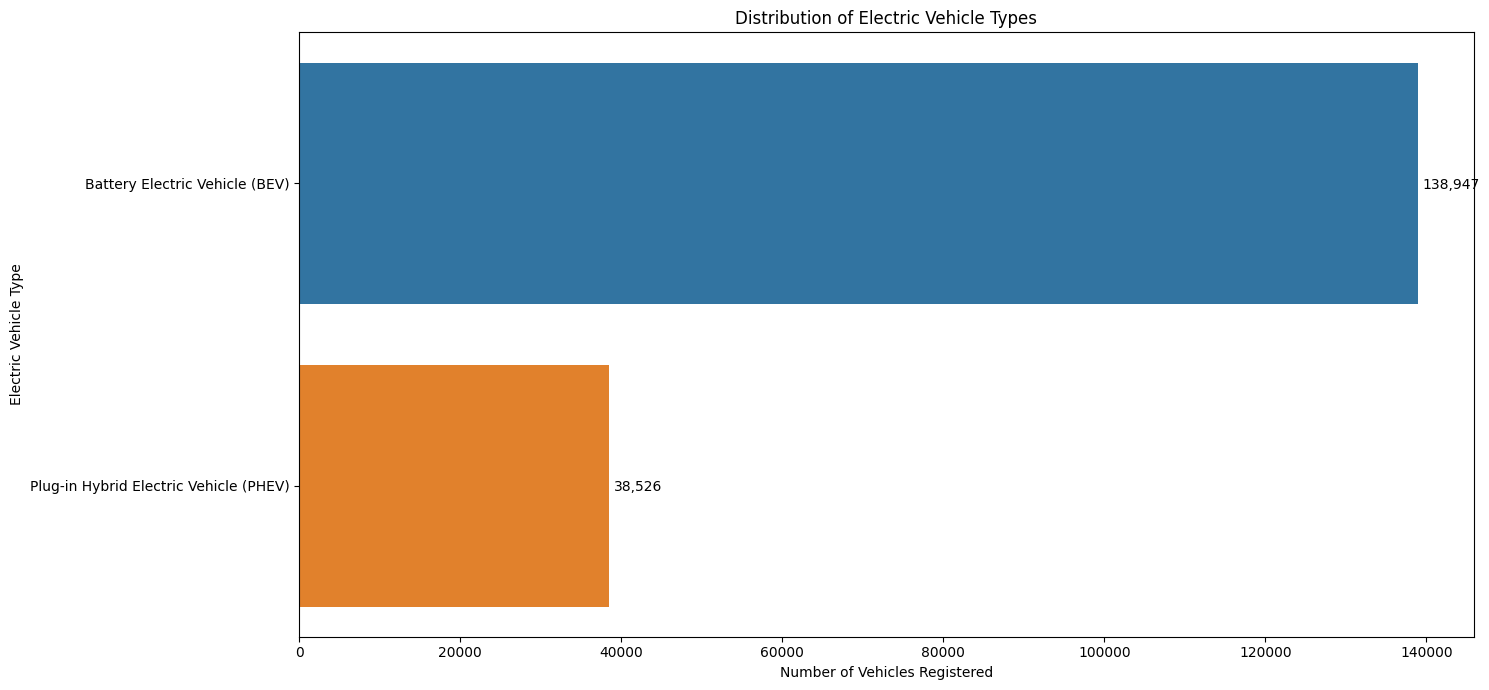

In [13]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=ev_type.values, y=ev_type.index, palette="tab10")

for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=10,
                    color='black')
        
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

Examining the distribution between different EV types, such as Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs), offers valuable insights into consumer preferences and the adoption trends of fully electric versus hybrid electric solutions. 

**The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.**

Now let's explore the Popular Brands(Manufacturer) and Models!

### Popular Brands(Manufacturer) and Models

In [14]:
brands = data['Make'].value_counts().head(10)

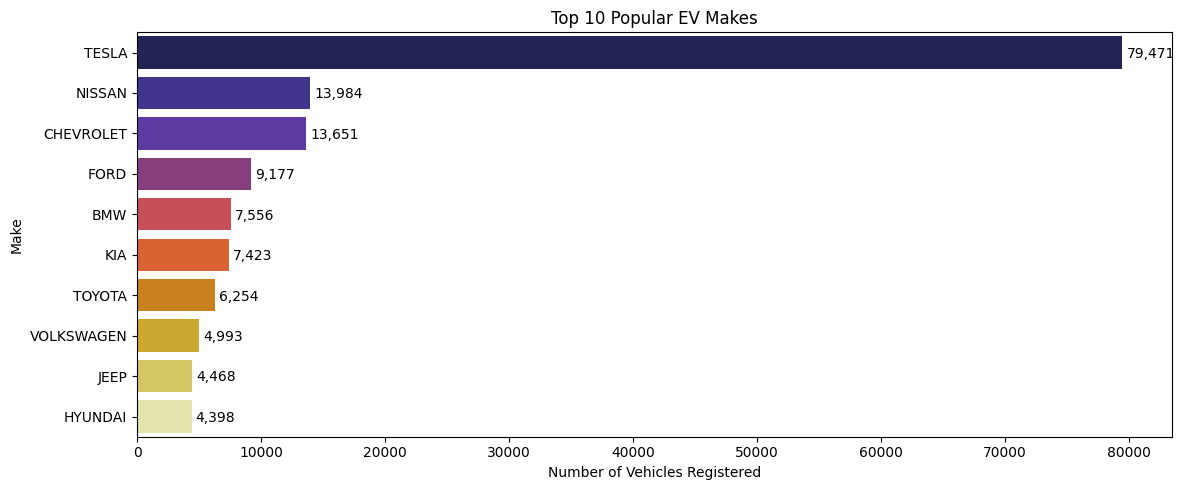

In [15]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=brands.values, y=brands.index, palette="CMRmap")

for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=10,
                    color='black')
        
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

The above chart shows that:

- TESLA leads by a substantial margin with the highest number of vehicles registered.
- NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level.

In [16]:
# Selecting the top 5 manufacturers based on the number of vehicles registered
top_brands = brands.head(5).index

# Filtering the dataset for these top manufacturers
top_brands_data = data[data['Make'].isin(top_brands)]

# Analyzing the popularity of EV models within these top manufacturer
model_popularity = top_brands_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

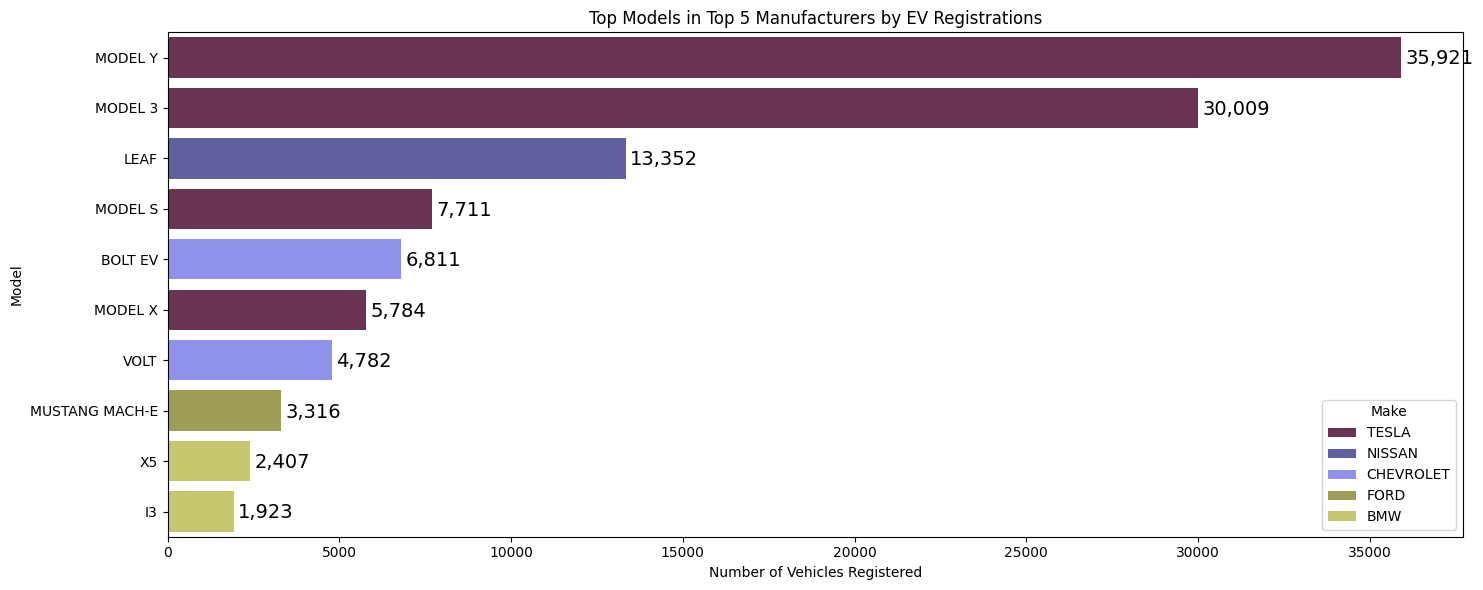

In [17]:
# Visualizing the top 10 models across these manufacturers for clarity
top_models = model_popularity.head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_models['Number of Vehicles'], 
            y=top_models['Model'], 
            hue=top_models['Make'], 
            palette="gist_stern",
            dodge=None)

for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=14,
                    color='black')
        
plt.title('Top Models in Top 5 Manufacturers by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='lower right')
plt.tight_layout()
plt.show()

Here are the findings from the above visual:

- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
- TESLA’s MODEL S and MODEL X also have a significant number of registrations.
- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- FORD's MUSTANG MACH-E and BMW's XS and I3 have the least number of registrations among the models shown.

Now let's explore the Electric Range of vehicles.

### Electric Range Assessment

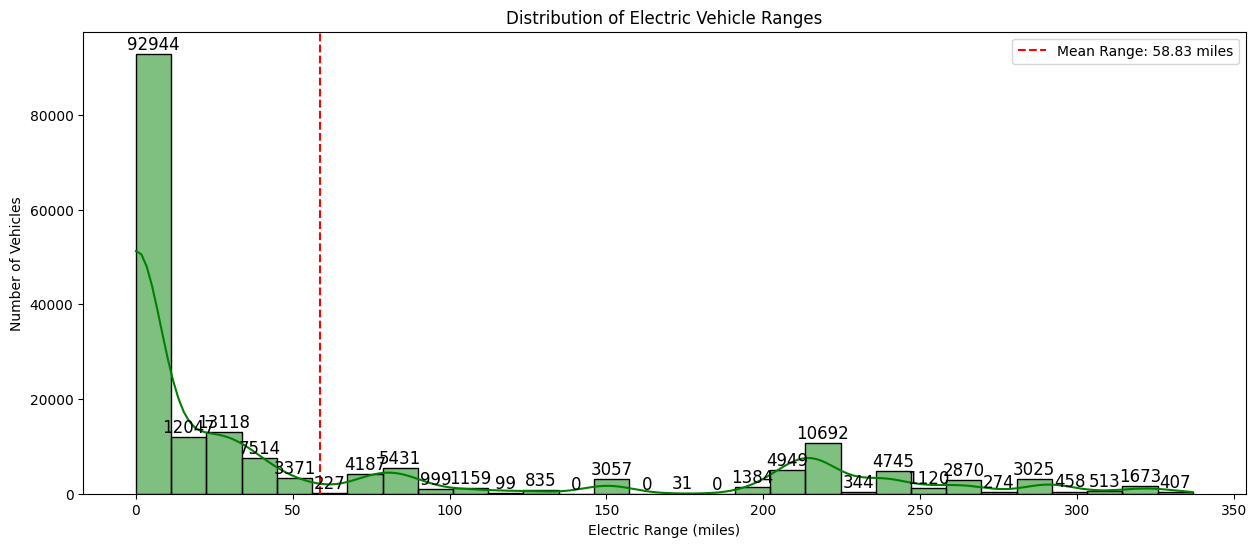

In [18]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(data['Electric Range'], bins=30, kde=True, color='green')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=12, 
                color='black', 
                xytext=(0, 7), 
                textcoords='offset points')
    
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. This helps in identifying any notable trends, such as improvements over time or variations between different vehicle types or manufacturers.

The above graph shows the mean electric range. Key observations from the graph include: 

- Many vehicles in the dataset have a low electric range, with a notable peak occurring just before 50 miles.
- The distribution of electric range is skewed to the right, indicating that there are more vehicles with lower ranges, but there is a long tail extending towards higher ranges.
- The average electric range for the vehicles in this dataset is approximately 58.84 miles. Despite the presence of vehicles with much higher ranges, the majority fall below this mean value.
- Although there are electric vehicles with ranges extending up to around 350 miles, they are less frequent compared to those with lower ranges.

**Overall, most vehicles in the dataset have a range below the mean, highlighting the prevalence of vehicles with relatively shorter electric ranges.**

Let's analyze the trend of **electric ranges over model years**, which provides insights into advancements in battery technology and vehicle design, indicating improvements in driving ranges over time, which can help alleviate concerns about range anxiety and boost consumer confidence in the EV market.

In [19]:
avg_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

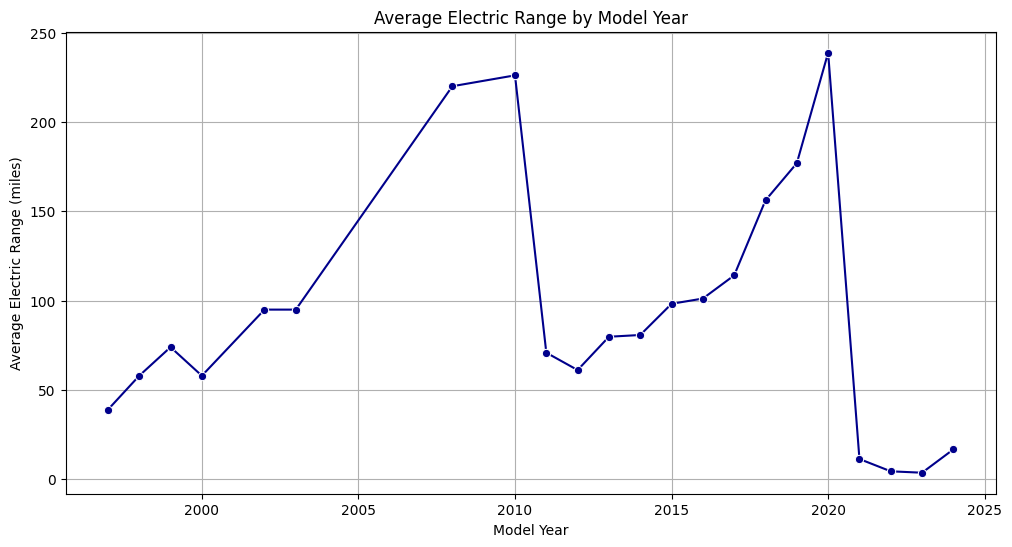

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_range_by_year['Model Year'], y=avg_range_by_year['Electric Range'], marker='o', color='darkblue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

- Over the years, there's a consistent increase in the average electric range of EVs, suggesting ongoing improvements in technology and battery efficiency.
- A notable peak is observed around the year 2020, marking the highest average range attained by EVs.
-  Following 2020, there's a significant decline in the average range, possibly due to incomplete data or the introduction of lower-range models.
- Despite the decline, there's a slight recovery in the average range in the most recent year shown on the graph, indicating a potential rebound in range capabilities.

**This suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.**

Next, let’s explore how **electric ranges vary among the top manufacturers and models**. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

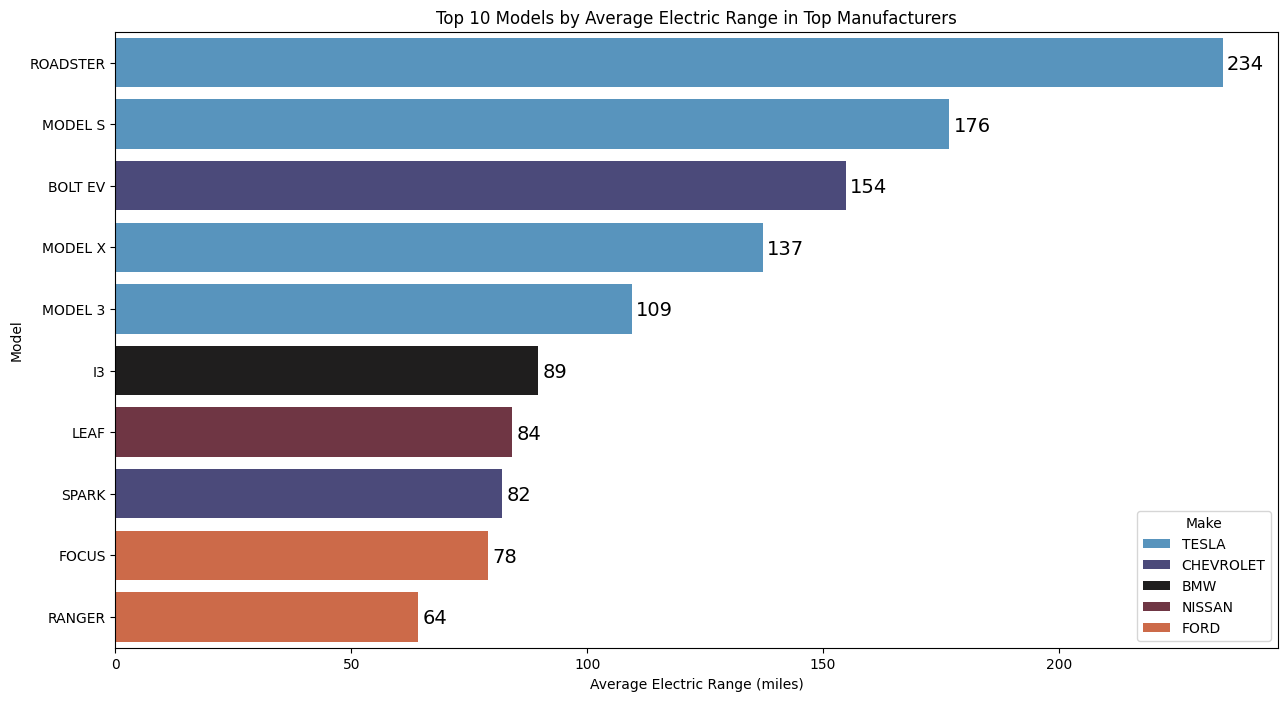

In [21]:
avg_range_by_model = top_brands_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = avg_range_by_model.head(10)

plt.figure(figsize=(15,8))
ax= sns.barplot(x=top_range_models['Electric Range'],
                      y=top_range_models['Model'],
                      hue=top_range_models['Make'],
                      palette="icefire",
                      dodge = None)

for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=14,
                    color='black')
        
plt.title('Top 10 Models by Average Electric Range in Top Manufacturers')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='lower right')
plt.show()

We can see that :

-  TESLA's models, including the ROADSTER, MODEL S, MODEL X, and MODEL 3, have the highest average electric ranges among the listed models, indicating TESLA's leadership in range capabilities.
- The CHEVROLET BOLT EV stands out among CHEVROLET models, boasting a significantly higher range.
-  Models like the NISSAN LEAF, CHEVROLET SPARK, BMW I3 and FORD's FOCUS and RANGER are positioned in the lower half of the chart, suggesting more modest average ranges compared to other models.

**The majority of top positions in terms of average electric range are occupied by TESLA's vehicles, reaffirming Tesla's reputation for offering EVs with higher ranges on average.**

Let's explore the CAFV Eligibility also!

In [22]:
cafv = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

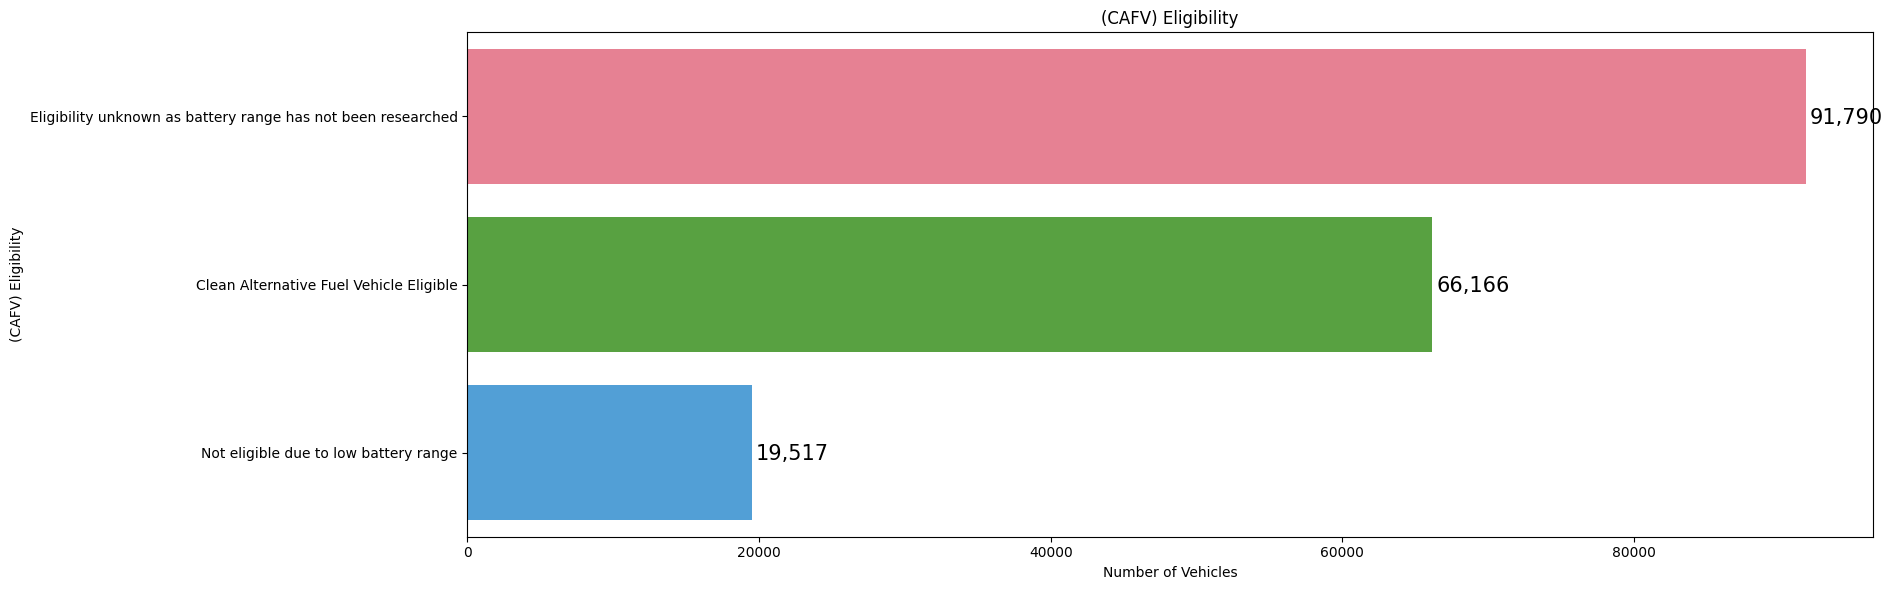

In [23]:
plt.figure(figsize=(19, 6))
ax = sns.barplot(x=cafv.values, y=cafv.index, palette="husl")

for p in ax.patches:
    if not np.isnan(p.get_width()):
        ax.annotate(f'{int(p.get_width()):,}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(3, -1), 
                    textcoords='offset points', 
                    ha='left', 
                    va='center', 
                    fontsize=15,
                    color='black')
        
plt.title('(CAFV) Eligibility')
plt.xlabel('Number of Vehicles')
plt.ylabel('(CAFV) Eligibility')
plt.tight_layout()
plt.show()

We can see from the graph above that:
- For about 91,790 EVs the CAFV eligibility is unknown due to incomplete information about battery range.
- About 66,166 EVs are eligible for CAFV
- And about 19,517 are not eligible for CAFV due to low battery range.

### Projected Market Expansion

In [24]:
ev_registration_counts = data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

- In 2021, there were 19,063 EVs registered.
- In 2022, the number increased to 27708 EVs.
- In 2023, a significant jump to 57,519 EVs was observed.
- For 2024, currently, 7,072 EVs are registered, which suggests partial data

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll can the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. 

The Compound Annual Growth Rate (CAGR) is a measure of the annual growth rate of an investment over a specified period of time, assuming that the investment has been compounding over that time period. In the context of electric vehicle registrations, the CAGR represents the average annual growth rate of registrations over the historical period.

For example, if the number of electric vehicle registrations increased from 100 in 2010 to 1000 in 2020, the CAGR would represent the average annual growth rate over that 10-year period, assuming exponential growth.

Let's do it!

In [25]:
# Historical data of EV registrations
ev_registration_counts = pd.Series({
    1997: 1, 1998: 1, 1999: 5, 2000: 7, 2002: 2, 2003: 1, 2008: 19,
    2010: 23, 2011: 775, 2012: 1614, 2013: 4399, 2014: 3496, 2015: 4826,
    2016: 5469, 2017: 8534, 2018: 14286, 2019: 10913, 2020: 11740,
    2021: 19063, 2022: 27708, 2023: 57519, 2024: 7072  # Incomplete data for 2024
})


In [26]:
# Function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(initial_value, final_value, years):
    return (final_value / initial_value) ** (1 / years) - 1

# Calculate CAGR
initial_year = ev_registration_counts.index[0]
final_year = ev_registration_counts.index[-2]
years = final_year - initial_year
cagr = calculate_cagr(ev_registration_counts[initial_year], ev_registration_counts[final_year], years)


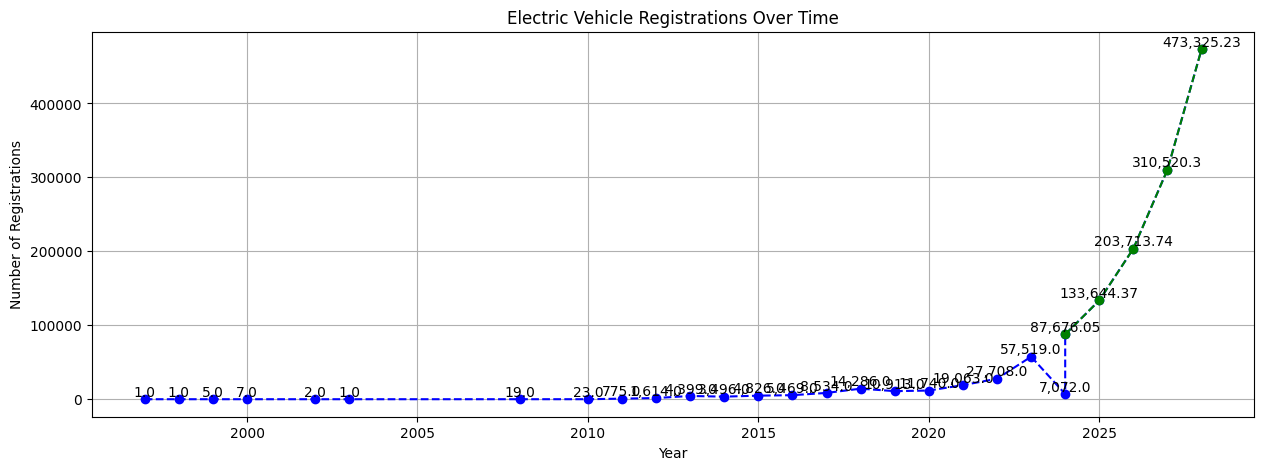

Compound Annual Growth Rate (CAGR): 52.43%
Forecasted Registrations for 2024 and the next 5 years:
2024     87676.05
2025    133644.37
2026    203713.74
2027    310520.30
2028    473325.23
dtype: float64
Combined Registrations Data (With forecasted values):
1997         1.00
1998         1.00
1999         5.00
2000         7.00
2002         2.00
2003         1.00
2008        19.00
2010        23.00
2011       775.00
2012      1614.00
2013      4399.00
2014      3496.00
2015      4826.00
2016      5469.00
2017      8534.00
2018     14286.00
2019     10913.00
2020     11740.00
2021     19063.00
2022     27708.00
2023     57519.00
2024      7072.00
2024     87676.05
2025    133644.37
2026    203713.74
2027    310520.30
2028    473325.23
dtype: float64


In [27]:
# Forecast future growth based on CAGR
future_years = np.arange(final_year + 1, final_year + 6)
forecasted_values = ev_registration_counts[final_year] * (1 + cagr) ** (future_years - final_year)

# Combine historical data and forecasted values
combined_data = pd.concat([ev_registration_counts, pd.Series(forecasted_values.round(2), index=future_years)])

# Plotting
plt.figure(figsize=(15, 5))
combined_data.plot(marker='o', linestyle='--', color='blue')  # Historical data in blue
plt.plot(future_years, forecasted_values, marker='o', linestyle='--', color='green')  # Forecasted data in green

for year, value in combined_data.items():
    plt.text(year, value, f'{value:,}', ha='center', va='bottom')


plt.title('Electric Vehicle Registrations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()

print("Compound Annual Growth Rate (CAGR): {:.2%}".format(cagr))
print("Forecasted Registrations for 2024 and the next 5 years:")
print(pd.Series(forecasted_values.round(2), index=future_years))
print("Combined Registrations Data (With forecasted values):")
print(combined_data)

From the above graph, we can see:

- Until about 2010, there weren't many electric vehicles registered, and the numbers stayed pretty consistent. But after that, there was a big change. More and more people started getting electric cars, and the number of registrations went up a lot. 
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

**Looking at the current rise in electric vehicle registrations and the expected surge based on the forecast, it's clear that the EV market is set to grow significantly. The increase in forecasted registrations indicates that more people are choosing electric vehicles, and this trend is likely to keep going. This paints a positive picture for the EV industry, showing a major change in what consumers want and potentially opening up new investment and business chances.**


That's all ! Thank you for exploring this far :)